In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{:.1f}'.format(width),
                    xy=(width,rect.get_y()),
                    xytext=(0, -10),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='left', va='bottom')


width = 0.9  # the width of the bars
root="bench-data/"
precisions=["double","float","half"]

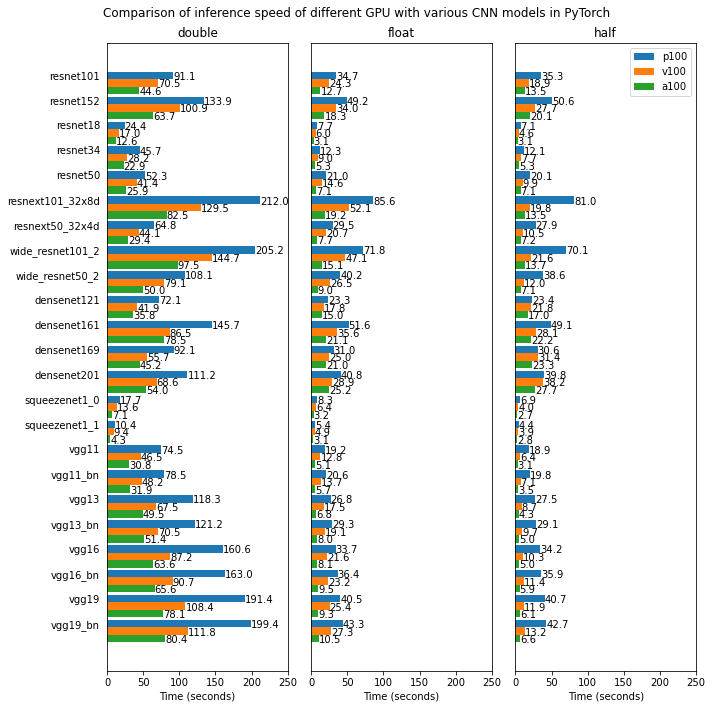

In [20]:
fig = plt.figure(figsize=(10,10))
suffix="_model_inference_benchmark.csv"

for i in range(len(precisions)):
    data_p100 = pd.read_csv(root+"Tesla P100-PCIE-16GB_1_gpus__"+precisions[i]+suffix,header=0)
    data_v100 = pd.read_csv(root+"Tesla V100-PCIE-16GB_1_gpus__"+precisions[i]+suffix,header=0)
    data_a100 = pd.read_csv(root+"NVIDIA A100-SXM4-40GB_1_gpus__"+precisions[i]+suffix,header=0)
    df_p100 = pd.DataFrame(data_p100)
    df_v100 = pd.DataFrame(data_v100)
    df_a100 = pd.DataFrame(data_a100)
    
    time_p100 = list(df_p100.iloc[-1, :])
    time_v100 = list(df_v100.iloc[-1, :])
    time_a100 = list(df_a100.iloc[-1, :])
    
    models = list(df_p100.columns)
    y_pos = np.arange(0,3*len(models),3)
    
    ax = fig.add_subplot(1,3,i+1)
    
    rects1 = ax.barh(y_pos          , time_p100, width, label='p100')
    rects2 = ax.barh(y_pos + width  , time_v100, width, label='v100')
    rects3 = ax.barh(y_pos + 2*width, time_a100, width, label='a100')
    
    ax.tick_params(bottom=True,top=False,left=False,right=False)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(models)
    ax.set_title(precisions[i])
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Time (seconds)')
    ax.set_xlim(0,250)
    if i > 0:
        ax.tick_params(labelleft=False)
    if i == len(precisions)-1:
        ax.legend()
    
    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    
plt.suptitle('Comparison of inference speed of different GPU with various CNN models in PyTorch')
fig.tight_layout()
plt.savefig('synthetic_inference.png')


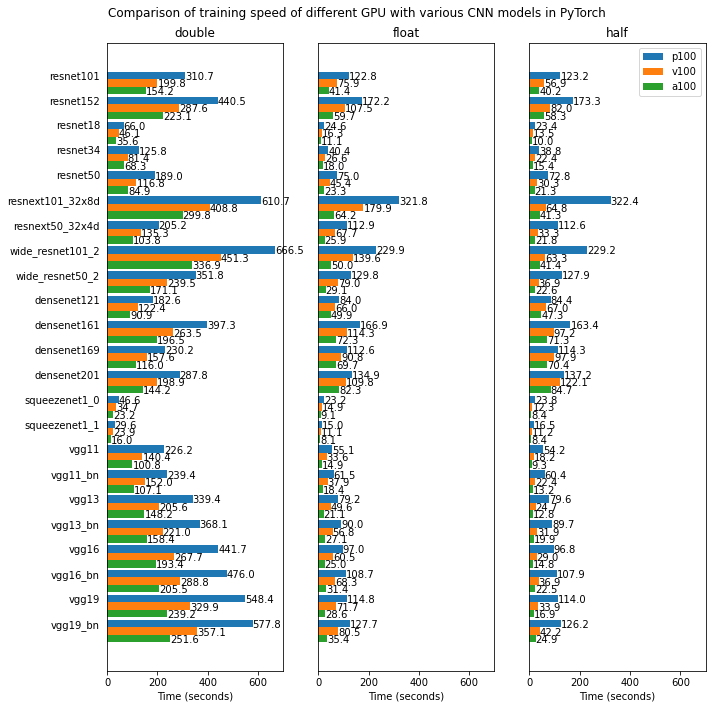

In [19]:
fig = plt.figure(figsize=(10,10))
suffix="_model_train_benchmark.csv"

for i in range(len(precisions)):
    data_p100 = pd.read_csv(root+"Tesla P100-PCIE-16GB_1_gpus__"+precisions[i]+suffix,header=0)
    data_v100 = pd.read_csv(root+"Tesla V100-PCIE-16GB_1_gpus__"+precisions[i]+suffix,header=0)
    data_a100 = pd.read_csv(root+"NVIDIA A100-SXM4-40GB_1_gpus__"+precisions[i]+suffix,header=0)
    df_p100 = pd.DataFrame(data_p100)
    df_v100 = pd.DataFrame(data_v100)
    df_a100 = pd.DataFrame(data_a100)
    
    time_p100 = list(df_p100.iloc[-1, :])
    time_v100 = list(df_v100.iloc[-1, :])
    time_a100 = list(df_a100.iloc[-1, :])
    
    models = list(df_p100.columns)
    y_pos = np.arange(0,3*len(models),3)
    
    ax = fig.add_subplot(1,3,i+1)
    
    rects1 = ax.barh(y_pos          , time_p100, width, label='p100')
    rects2 = ax.barh(y_pos + width  , time_v100, width, label='v100')
    rects3 = ax.barh(y_pos + 2*width, time_a100, width, label='a100')
    
    ax.tick_params(bottom=True,top=False,left=False,right=False)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(models)
    ax.set_title(precisions[i])
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Time (seconds)')
    ax.set_xlim(0,700)

    if i > 0:
        ax.tick_params(labelleft=False)
    if i == len(precisions)-1:
        ax.legend()

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)


plt.suptitle('Comparison of training speed of different GPU with various CNN models in PyTorch')
fig.tight_layout()
plt.savefig('synthetic_training.png')